Loading a Dataset
-------------------

Here is an example of how to load the `Fashion-MNIST <https://research.zalando.com/project/fashion_mnist/fashion_mnist/>`_ dataset from TorchVision.
Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples.
Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the `FashionMNIST Dataset <https://pytorch.org/vision/stable/datasets.html#fashion-mnist>`_ with the following parameters:
 - ``root`` is the path where the train/test data is stored,
 - ``train`` specifies training or test dataset,
 - ``download=True`` downloads the data from the internet if it's not available at ``root``.
 - ``transform`` and ``target_transform`` specify the feature and label transformations



In [2]:
%matplotlib inline
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torch.utils.data import random_split

import numpy as np
import pandas as pd
import io
import os


In [3]:

training_data = datasets.FashionMNIST(
    root="fmnist",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="fmnist",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting fmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting fmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting fmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting fmnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw

Processing...


/opt/conda/lib/python3.6/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


Iterating and Visualizing the Dataset
-----------------

We can index ``Datasets`` manually like a list: ``training_data[index]``.
We use ``matplotlib`` to visualize some samples in our training data.



In [4]:
# Each item is a couple of image data and a label - GRAY IMAGE
img, label = training_data[1]
np.array(img.squeeze()).shape

(28, 28)

In [5]:
labels_names = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle-Boot",
}
# Create a function to show an image and try to save an image
def create_image(data_image):
    '''
    data_image: an image with label from torch dataset
    '''
    img, label = data_image
    plt.imshow(img.squeeze(), cmap="gray")
    # We use jpg format.
    filename = labels_names[label]+'.jpg'
    plt.imsave(filename, np.array(img.squeeze()), cmap='gray')
    print('Image file name: ',filename)
    

Image file name:  Coat.jpg


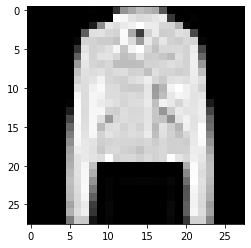

In [6]:
# Test our function by choose an image randomly
random_idx = torch.randint(len(training_data), size=(1,)).item()
create_image(training_data[random_idx])

In [7]:
len(training_data)

60000

In [8]:
from torchvision.utils import make_grid
from torch.utils.data import random_split

# Create valid data
valid_size = int(0.2 * len(training_data))
train_size = int(0.8 * len(training_data))
valid, train = random_split(training_data, [valid_size, train_size])
print(len(valid), len(train))

12000 48000


In [9]:
! mkdir images

In [10]:
%%capture
def write_images(dataset, dirname):
    fullnames_list = []
#     image_size = 32*32
#     image_resolution = (32,32)
#     data = np.array(df.drop(columns=['label', 'filename']))
    # Create folder 
    if os.path.isdir(dirname) == False:
        os.mkdir(dirname)
    # create subfolder 0-> 9
    for j in range(10):
        newdir = dirname+'/'+str(j)
        if os.path.isdir(newdir) == False:
            os.mkdir(newdir)
    count = [0 for j in range(10)]
    
    for n in range(len(dataset)):
        img, label = dataset[n]
        count[label] += 1
        # Create filename
        fullname = dirname + '/' + str(label) + '/' + labels_names[label] + '_' 
        # We use jpg format.
        fullname += str(count[label]) + '.jpg'
        fullnames_list.append(fullname)
        
        # write image file
        image = np.array(img.squeeze())
        plt.imsave(os.path.normpath(fullname), image, cmap='gray')
    # create new column 'fullname' for dataframe 
    tmp = pd.DataFrame({'fullname': fullnames_list})
#     tmp = pd.concat([tmp, df], axis=1)
    return tmp
# test function
test_df = write_images(test_data, 'images/test')
train_df = write_images(train, 'images/train')
valid_df = write_images(valid, 'images/valid')

In [11]:
print(len(test_df), len(train_df), len(valid_df))

10000 48000 12000


In [12]:
test_df.head()

,fullname
0,images/test/9/Ankle-Boot_1.jpg
1,images/test/2/Pullover_1.jpg
2,images/test/1/Trouser_1.jpg
3,images/test/1/Trouser_2.jpg
4,images/test/6/Shirt_1.jpg


In [13]:
# Try to get label from fullname
valid_df['label'] = valid_df['fullname'].apply(lambda x: x.split('/')[2])
valid_df['label'].value_counts()

3    1282
9    1233
1    1227
6    1225
2    1213
4    1189
8    1182
7    1175
5    1152
0    1122
Name: label, dtype: int64

In [14]:
def add_label(df):
    df['label'] = df['fullname'].apply(lambda x: int(x.split('/')[2]))
    return df

train_df = add_label(train_df)
valid_df = add_label(valid_df)
test_df = add_label(test_df)

In [15]:
valid_df.info()
test_df.info()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fullname  12000 non-null  object
 1   label     12000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 187.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fullname  10000 non-null  object
 1   label     10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fullname  48000 non-null  object
 1   label     48000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 750.1+ KB


In [16]:
# Save filename list for later use
def save_df2csv(df, csvname):
    df.to_csv(csvname, index=False)

save_df2csv(test_df, 'test.csv')
save_df2csv(train_df, 'train.csv')
save_df2csv(valid_df, 'valid.csv')

# Now we have folder images with 3 subfolders train, valid, and test.

In [17]:
! ls -l images

total 12
drwxr-xr-x 12 root root 6144 Feb  7 04:50 test
drwxr-xr-x 12 root root 6144 Feb  7 04:53 train
drwxr-xr-x 12 root root 6144 Feb  7 05:03 valid


In [18]:
import pandas as pd
testset = pd.read_csv('test.csv')
testset.head()

,fullname,label
0,images/test/9/Ankle-Boot_1.jpg,9
1,images/test/2/Pullover_1.jpg,2
2,images/test/1/Trouser_1.jpg,1
3,images/test/1/Trouser_2.jpg,1
4,images/test/6/Shirt_1.jpg,6


In [19]:
testset['label'] = testset['fullname'].apply(lambda x: x.split('/')[2])
testset['label'].value_counts()

7    1000
2    1000
6    1000
0    1000
4    1000
3    1000
1    1000
9    1000
5    1000
8    1000
Name: label, dtype: int64

In [20]:
labels_names = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coatadd_label", 
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle-Boot",
}
classes = pd.DataFrame({'class_name': labels_names})
classes.to_csv('classes.csv', index=False)